In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weatherAUS.csv')

EDA
---

In [3]:
# dimention of the dataset
df.shape

(142193, 24)

In [4]:
# preview the dataset
df.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [5]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [7]:
df.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

In [8]:
df.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

We have a dataset that consist of 142193 entries and 24 columns. There are 17 float type column and 7 object type, and plenty of Null values. As we see from the df.head() the 'RainTomorrow' is our target column. We are going to make models that predic this value.  

#### Explore Numerical Columns


In [9]:
df.describe().T

count         mean        std    min     25%     50%  \
MinTemp        141556.0    12.186400   6.403283   -8.5     7.6    12.0   
MaxTemp        141871.0    23.226784   7.117618   -4.8    17.9    22.6   
Rainfall       140787.0     2.349974   8.465173    0.0     0.0     0.0   
Evaporation     81350.0     5.469824   4.188537    0.0     2.6     4.8   
Sunshine        74377.0     7.624853   3.781525    0.0     4.9     8.5   
WindGustSpeed  132923.0    39.984292  13.588801    6.0    31.0    39.0   
WindSpeed9am   140845.0    14.001988   8.893337    0.0     7.0    13.0   
WindSpeed3pm   139563.0    18.637576   8.803345    0.0    13.0    19.0   
Humidity9am    140419.0    68.843810  19.051293    0.0    57.0    70.0   
Humidity3pm    138583.0    51.482606  20.797772    0.0    37.0    52.0   
Pressure9am    128179.0  1017.653758   7.105476  980.5  1012.9  1017.6   
Pressure3pm    128212.0  1015.258204   7.036677  977.1  1010.4  1015.2   
Cloud9am        88536.0     4.437189   2.887016    0.0     1.0     5.0   
Cloud3pm        85099.0     4.503167   2.720633    0.0     2.0     5.0   
Temp9am        141289.0    16.987509   6.492838   -7.2    12.3    16.7   
Temp3pm        139467.0    21.687235   6.937594   -5.4    16.6    21.1   
RISK_MM        142193.0     2.360682   8.477969    0.0     0.0     0.0   

                  75%     max  
MinTemp          16.8    33.9  
MaxTemp          28.2    48.1  
Rainfall          0.8   371.0  
Evaporation       7.4   145.0  
Sunshine         10.6    14.5  
WindGustSpeed    48.0   135.0  
WindSpeed9am     19.0   130.0  
WindSpeed3pm     24.0    87.0  
Humidity9am      83.0   100.0  
Humidity3pm      66.0   100.0  
Pressure9am    1022.4  1041.0  
Pressure3pm    1020.0  1039.6  
Cloud9am          7.0     9.0  
Cloud3pm          7.0     9.0  
Temp9am          21.6    40.2  
Temp3pm          26.4    46.7  
RISK_MM           0.8   371.0

From description of numerical columns we see that we have outliers in 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'RISK_MM' these columns based on the relationship beetween max and mean values. There are huge gap between these values. So we are going to do outlier cleaning at these columns. Also the 'RISK_MM' column's 50% consist of 0s, we will look at this column if it is meaningless to keep this column we will drop it.

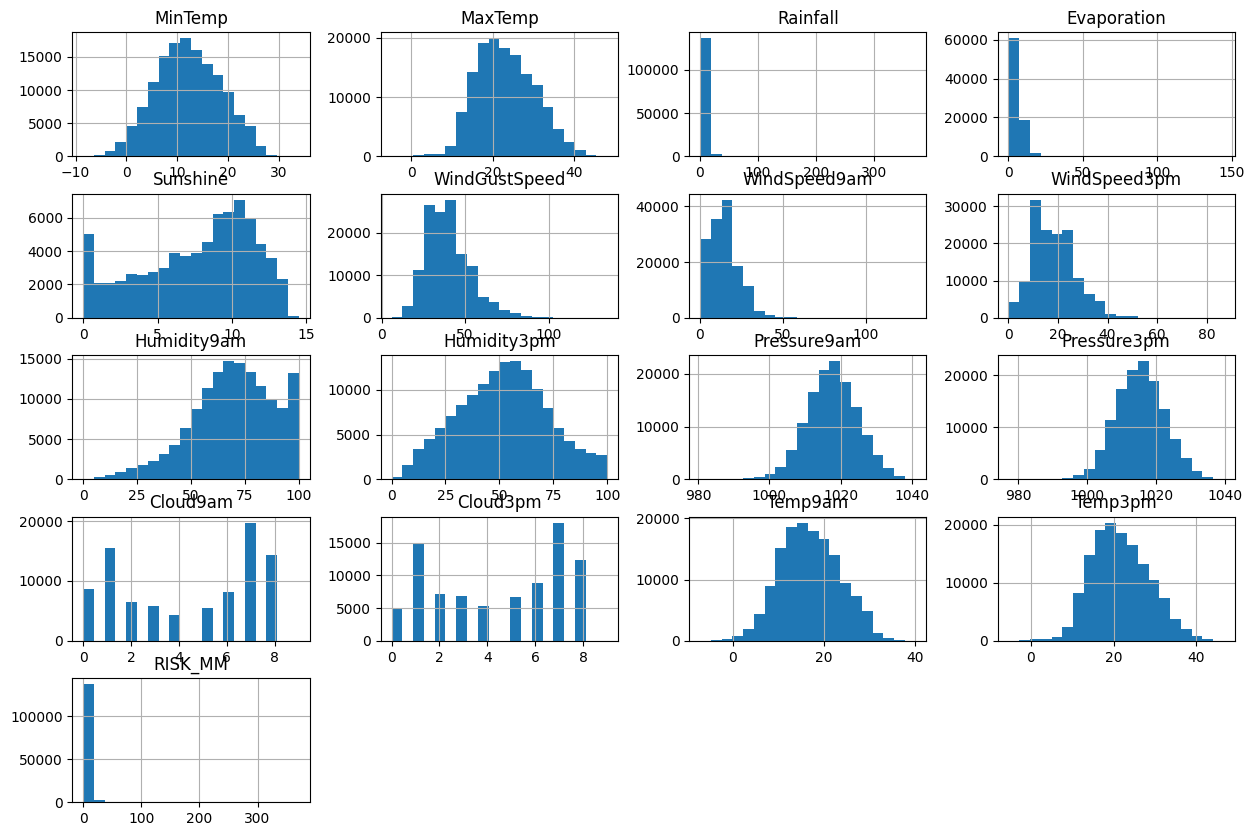

In [10]:
# With this distribution of numerical features we can see the outliers more clearly
df.hist(bins=20, figsize=(15, 10))
plt.show()

In [11]:
numerical = [num for num in df.columns if df[num].dtype!='O']
df[numerical].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RISK_MM              0
dtype: int64

In [12]:
df['RISK_MM']

0         0.0
1         0.0
2         0.0
3         1.0
4         0.2
         ... 
142188    0.0
142189    0.0
142190    0.0
142191    0.0
142192    0.0
Name: RISK_MM, Length: 142193, dtype: float64

In [13]:
risk = ['RISK_MM', 'RainTomorrow']
df[(df['RISK_MM'] > 0.5 ) & (df['RainTomorrow'] == 'No')][risk].head()

RISK_MM RainTomorrow
3        1.0           No
28       0.8           No
49       0.8           No
50       0.6           No
175      0.8           No

In [14]:
df[(df['RISK_MM'] > 1)][risk].head()

RISK_MM RainTomorrow
8       1.4          Yes
10      2.2          Yes
11     15.6          Yes
12      3.6          Yes
15     16.8          Yes

In [15]:
df[(df['RISK_MM'] >1) & (df['RainTomorrow'] == 'No')][risk].head()

Empty DataFrame
Columns: [RISK_MM, RainTomorrow]
Index: []

As we can see this the 'RISK_MM' column is showing us the same thing as RainTomorrow. It is just the probability of rain. So it is not necessary for our model to have it and we can drop it.

In [4]:
df.drop('RISK_MM', axis=1, inplace=True)

##### Explore Categorical Columns

In [17]:
df.describe(include=['object']).T

count unique         top    freq
Date          142193   3436  2013-12-01      49
Location      142193     49    Canberra    3418
WindGustDir   132863     16           W    9780
WindDir9am    132180     16           N   11393
WindDir3pm    138415     16          SE   10663
RainToday     140787      2          No  109332
RainTomorrow  142193      2          No  110316

The 'Date' column is in the object format. It will be hard to predict something based on this. We will convert it into a date format and extract the year, month, and day separately for the better performance of our model. There are 49 countries in the 'Location' column, with 16 wind directions in each column: 'WindGustDir' and  'WindDir9am', 'WindDir3pm'. 'RainToday' and 'RainTomorrow' are binary categorical variables.

Except 'Date' they are all categorical

In [18]:
# Analyzing the target column
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

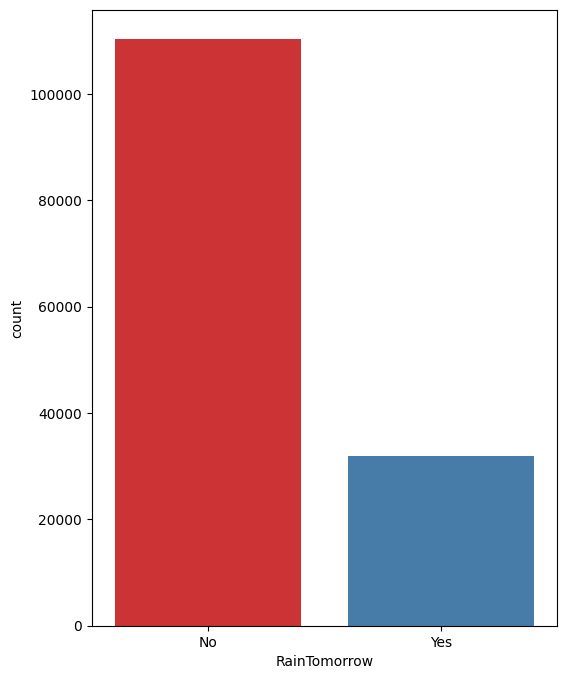

In [19]:
# Visualize frequency distribution of RainTomorrow variable
f, ax = plt.subplots(figsize=(6, 8))
ax = sns.countplot(x="RainTomorrow", data=df, palette="Set1")
plt.show()

#### Number of labels: cardinality
The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. So, I will check for high cardinality.

In [20]:
# check for cardinality in categorical variables
categorical = [cat for cat in df.columns if df[cat].dtype=='O']
for cat in categorical:
    print(cat, ' contains ', len(df[cat].unique()), ' labels')


Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  2  labels


We can see that there is a Date variable which needs to be preprocessed.

In [21]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64

4 categorical column consist of Null values 

/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_21118/3989762636.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


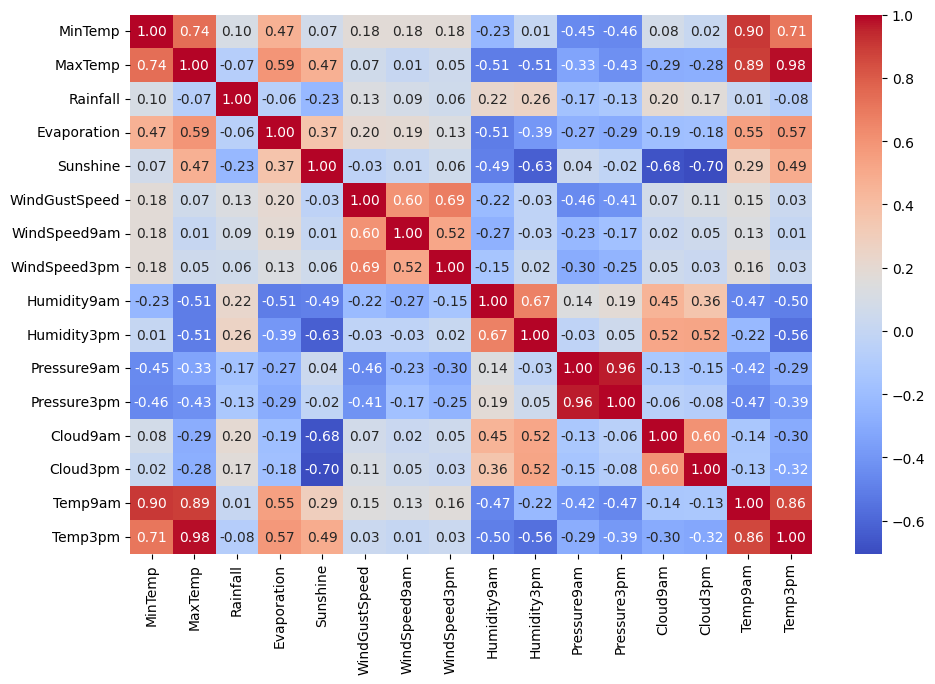

In [22]:
# Correlation heatmap
plt.figure(figsize=(11, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

From the above correlation heat map, we can conclude that :-  
strongly positively correlated:
MinTemp and Temp9am variables corr coef = 0.90.  
MaxTemp and Temp9am variables corr coef = 0.89.  
MaxTemp and Temp3pm variables corr coef = 0.98.  
Pressure9am and Pressure3pm variables corr coef = 0.96.  
Temp9am and Temp3pm variables corr coef = 0.86.  

highly positively correlated:  
WindGustSpeed and WindSpeed3pm variables corr coef = 0.69.  
MinTemp and MaxTemp variables corr coef = 0.74.  
MinTemp and Temp3pm variables corr coef = 0.71.  

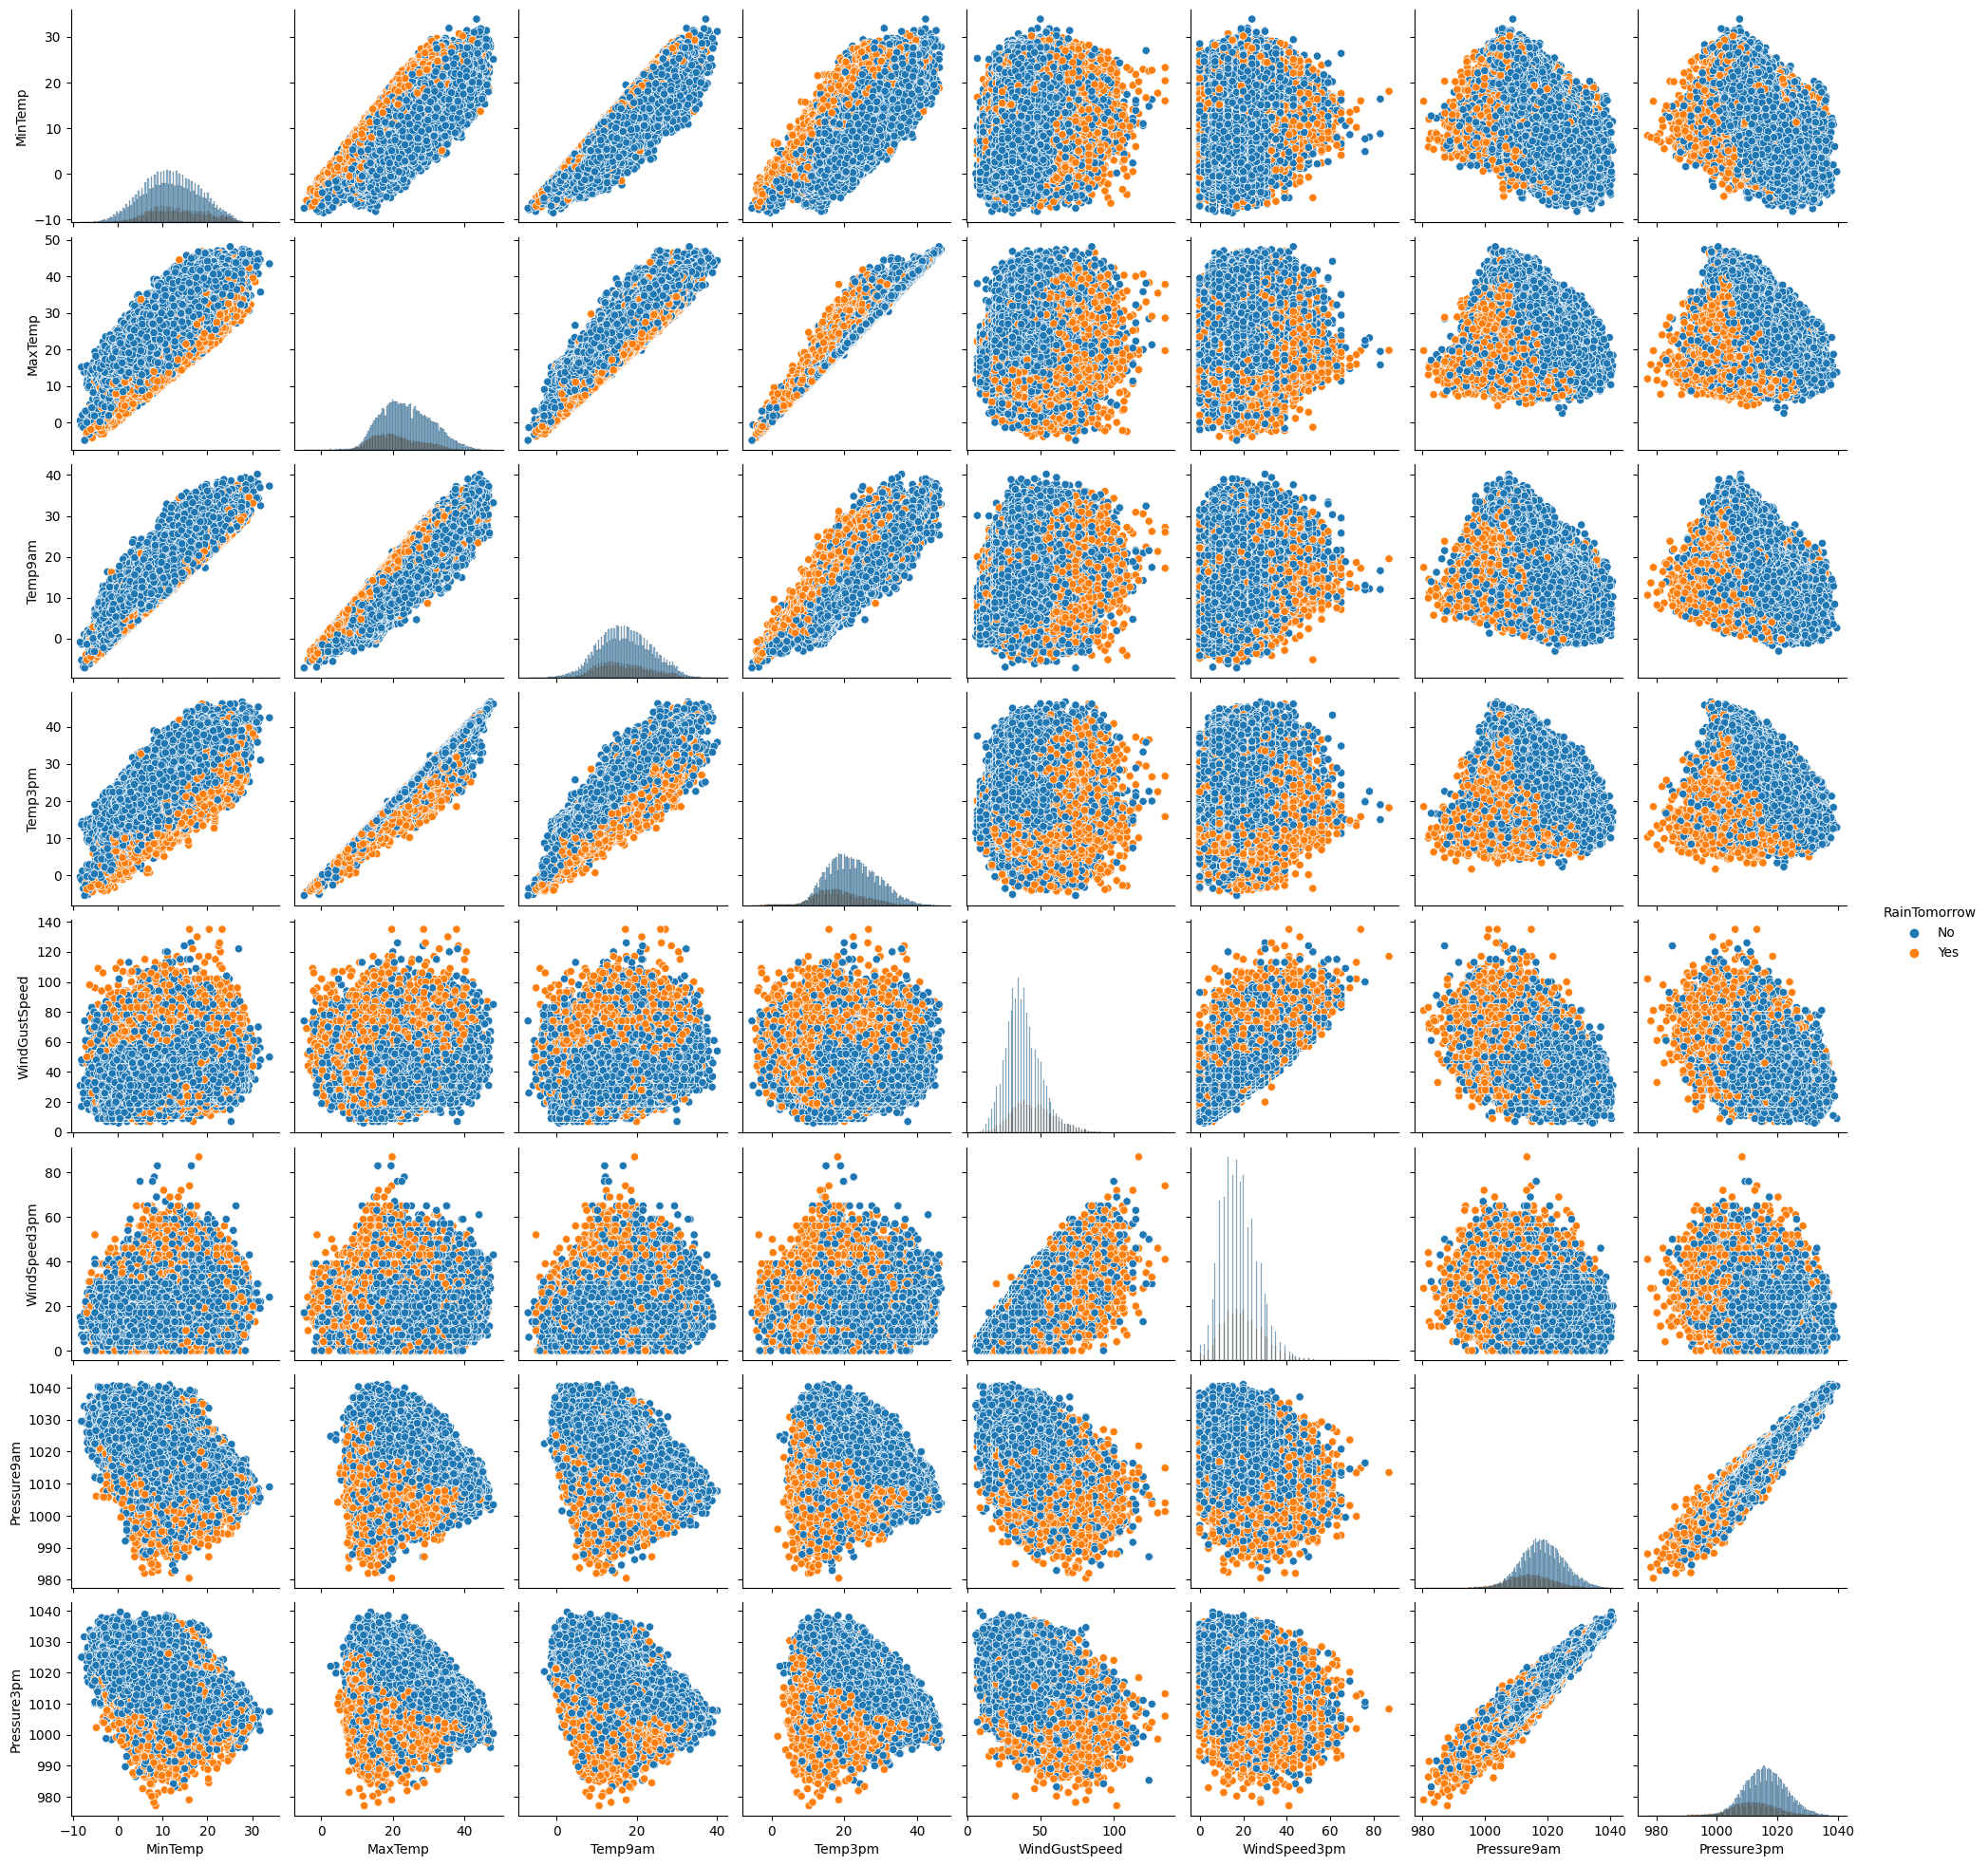

In [23]:
num_var = ['MinTemp', 'MaxTemp', 'Temp9am', 'Temp3pm', 'WindGustSpeed', 'WindSpeed3pm', 'Pressure9am', 'Pressure3pm', 'RainTomorrow']
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist', hue='RainTomorrow')
plt.show()

As we can see there is a clear distribution between variables that say there will be rain or not

Pre-Processing
---

For future vizualiations we have to rearraange the categorical columns. We will change 'Date' column, do encodings on other categorical columns and handle Null values 

##### Feature Engineering of 'Date' Variables

In [5]:
df['Date'].dtypes

dtype('O')

In [6]:
# Change them into datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
# Extract year, month and day from date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [9]:
# Now we can delete the 'Date' column
df.drop('Date', axis=1, inplace = True)
df.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Year  Month  Day  
0     16.9     21.8         No            No  2008     12    1  
1     17.2     24.3         No            No  2008     12    2  
2     21.0     23.2         No            No  2008     12    3  
3     18.1     26.5         No            No  2008     12    4  
4     17.8     29.7         No            No  2008     12    5  

[5 rows x 25 columns]

### Handling Ouliers

We found that we have outliers in 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm' columns but lets take a look at all columns

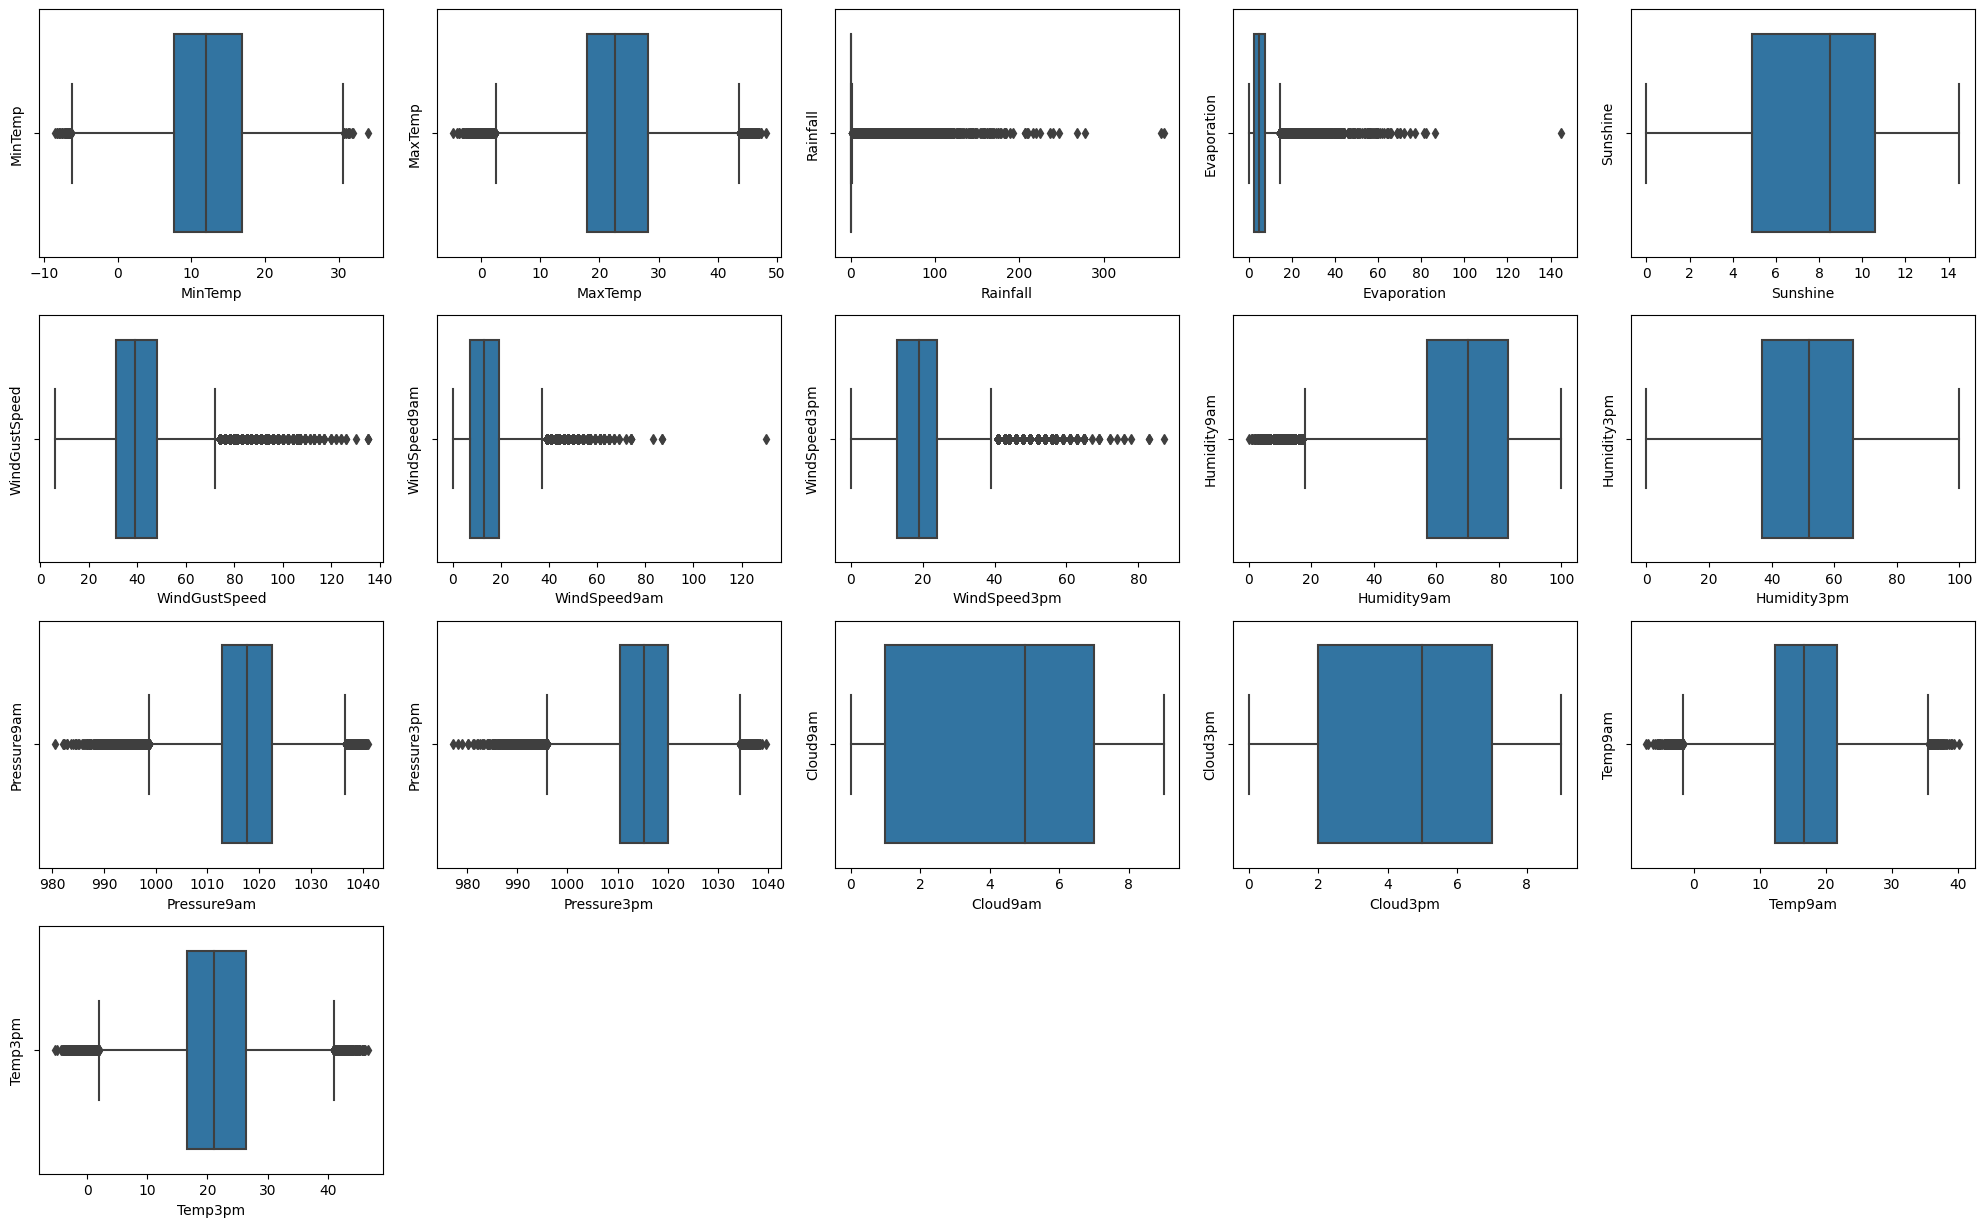

In [29]:
plt.figure(figsize=(20, 15))

for i, column in enumerate(df.select_dtypes(include='float').columns, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(x=df[column])
    plt.title('')
    plt.xlabel(column)
    plt.ylabel(column)

plt.tight_layout()
plt.show()


As we can observe, the primary outliers still exist in the 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', and 'WindSpeed3pm' columns. However, outliers are also present in other columns. Nevertheless, we will disregard them since their impact is not significantly substantial. We will look at the outliers of 5 column more clearly and fix them. 

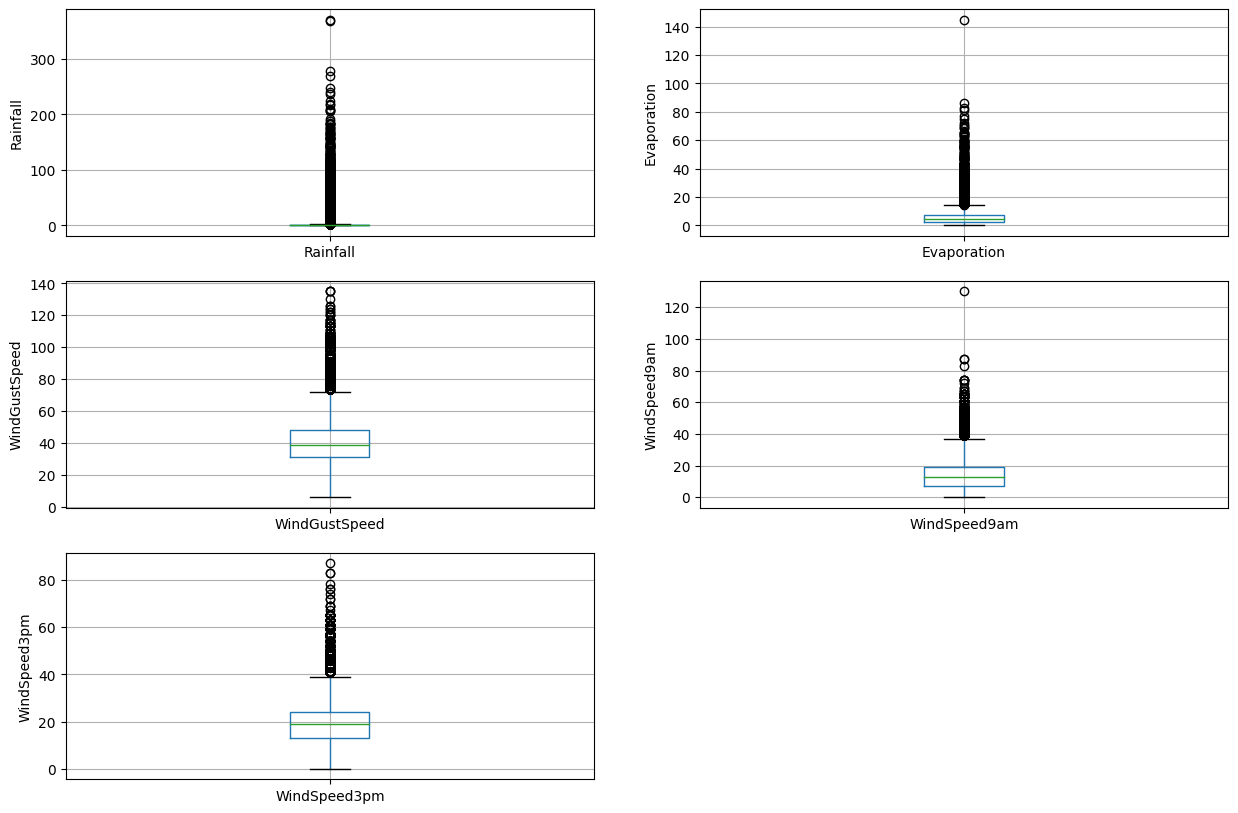

In [12]:
# draw boxplots to visualize outliers
outlier_columns = ['Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm']

plt.figure(figsize=(15,10))
for i, col in enumerate(outlier_columns):
    plt.subplot(3, 2, i+1)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

We can see that outliers exist only above the upper limit

In [13]:
def iqr_calc(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    return upper_limit

In [14]:
# Function for calculate the lower and upper limits
for col in outlier_columns:
    print(f"Upper Limit of {col}: {iqr_calc(col)}")

Upper Limit of Rainfall: 2.0
Upper Limit of Evaporation: 14.600000000000001
Upper Limit of WindGustSpeed: 73.5
Upper Limit of WindSpeed9am: 37.0
Upper Limit of WindSpeed3pm: 40.5


In [15]:
for col in outlier_columns:
    per = df[df[col]>iqr_calc(col)][col].count()/df[col].count()
    print(f'The percent of outlier of {col} column is {per}')

The percent of outlier of Rainfall column is 0.17919268114243503
The percent of outlier of Evaporation column is 0.024019668100799016
The percent of outlier of WindGustSpeed column is 0.02261459642048404
The percent of outlier of WindSpeed9am column is 0.012346906173453086
The percent of outlier of WindSpeed3pm column is 0.017612117824924944


Only the outliers in the 'Rainfall' column are significantly high; outliers in other columns can be easily replaced with the upper limit. After replacing them, we will analyze the 'Rainfall' column more thoroughly.

/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_17499/4064772918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[df[df[col] > up_limit].index] = up_limit
/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_17499/4064772918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].loc[df[df[col] > up_limit].index] = up_limit
/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_17499/4064772918.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

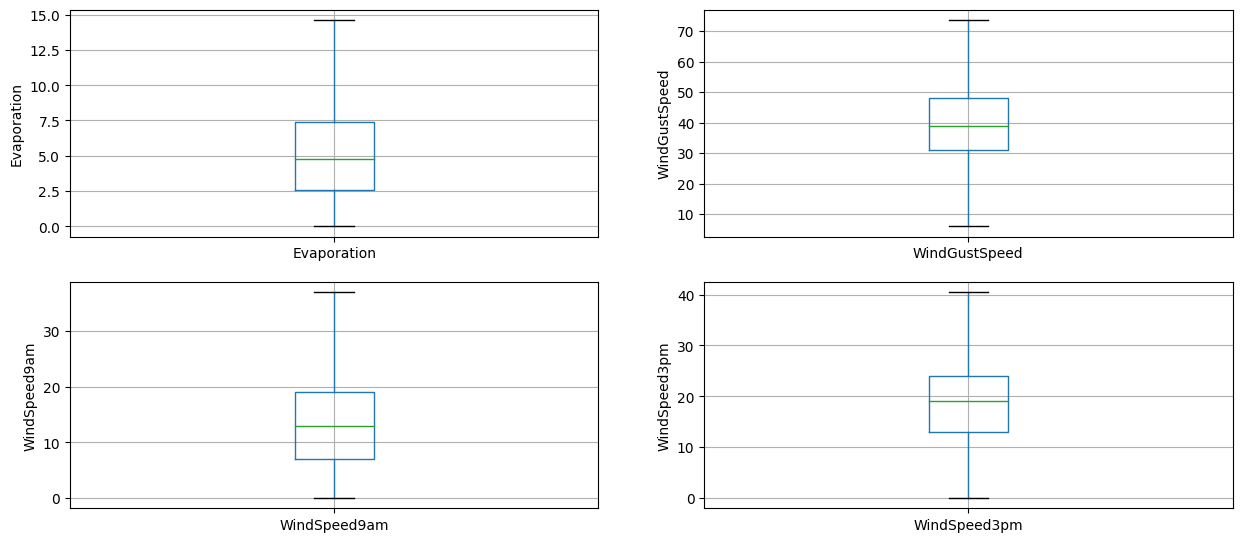

In [16]:
outlier_columns.remove('Rainfall')
plt.figure(figsize=(15,10))
# Change the outliers and draw the boxplots again
for i, col in enumerate(outlier_columns):
    up_limit = iqr_calc(col)
    df[col].loc[df[df[col] > up_limit].index] = up_limit
    plt.subplot(3, 2, i+1)
    fig = df.boxplot(column=col)
    fig.set_title('')
    fig.set_ylabel(col)

All outliers have been addressed except for those in the 'Rainfall' column. Let's delve deeper into it.

<Axes: >

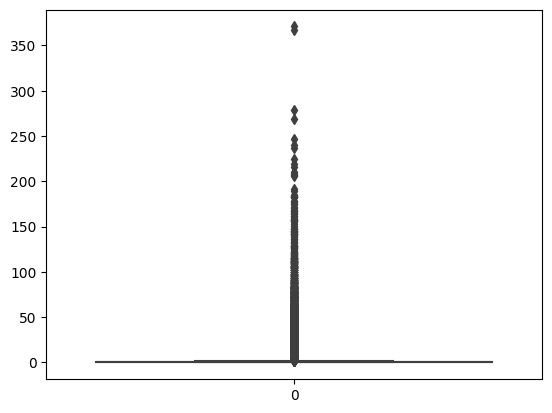

In [35]:
sns.boxplot(df['Rainfall'])

In [36]:
df[df['Rainfall']>150]['Rainfall'].count()

44

<Axes: >

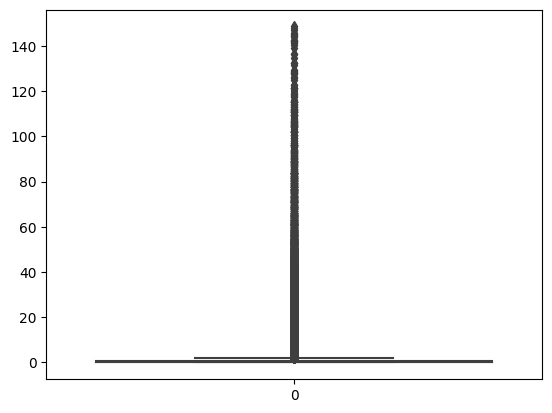

In [37]:
# I will drop data points greater than 200 as they are excessively high, and their occurrence is minimal.
df = df.drop(df[df['Rainfall']>150].index, axis=0)
sns.boxplot(df['Rainfall'])

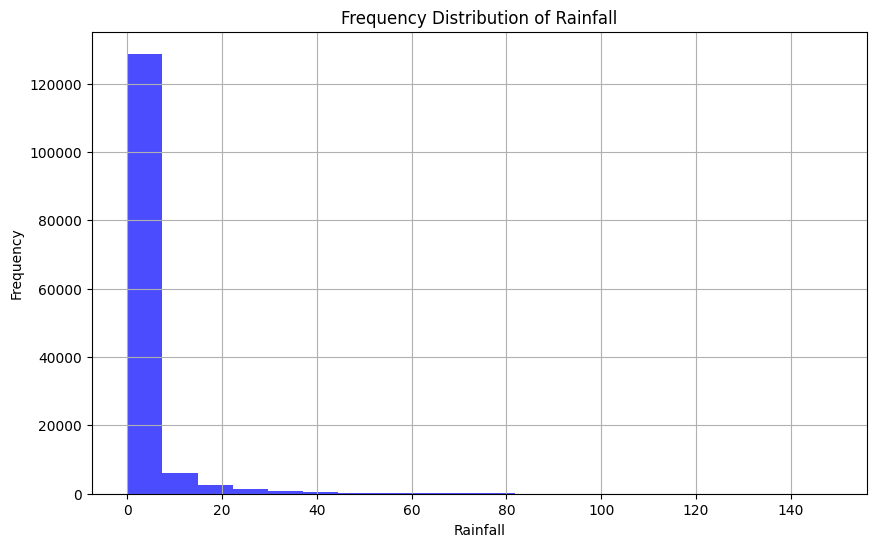

In [38]:
# Plot the frequency distribution using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Rainfall'], bins=20, color='blue', alpha=0.7)
plt.title(f'Frequency Distribution of Rainfall')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [39]:
# Assuming 'numerical_column' is the name of your numerical column
numerical_column = 'Rainfall'

# Calculate the percentage distribution
percentage_distribution = df['Rainfall'].value_counts(normalize=True) * 100

# Print the result
print(f'Percentage Distribution of Rainfall: \n{percentage_distribution}')


Percentage Distribution of Rainfall: 
0.0      64.141734
0.2       6.170822
0.4       2.664431
0.6       1.820339
0.8       1.440924
           ...    
78.6      0.000711
139.0     0.000711
106.2     0.000711
142.8     0.000711
69.0      0.000711
Name: Rainfall, Length: 635, dtype: float64


In [40]:
df[df['Rainfall']>2]['Rainfall'].count()/df['Rainfall'].count()

0.1789360749735333

In [41]:
df[df['Rainfall']>2]['RainTomorrow'].value_counts()

No     12720
Yes    12464
Name: RainTomorrow, dtype: int64

In [42]:
df[df['Rainfall']<2]['RainTomorrow'].value_counts()

No     96180
Yes    18355
Name: RainTomorrow, dtype: int64

In [43]:
df[df['Rainfall']>2]['RainToday'].value_counts()

Yes    25184
Name: RainToday, dtype: int64

In [44]:
df[df['Rainfall']<1.1]['RainToday'].value_counts()

No    109332
Name: RainToday, dtype: int64

In [45]:
df[df['Rainfall']>=1.1]['RainToday'].value_counts()

Yes    31411
Name: RainToday, dtype: int64

As we see there are no any exact relationship between 'Rainfall' and 'RainTomorrow', but we have a relationship between 'Rainfall' and 'RainToday'. The values of 'Rainfall' which are greater than and equal to 1.1 the 'RainToday column is 'Yes', and in other values it is 'No'. So we can confidently change values which are greater than upper limit which is 2 to the upper limit itself.

In [17]:
up_limit = iqr_calc('Rainfall')
df['Rainfall'].loc[df[df['Rainfall'] > up_limit].index] = up_limit

/var/folders/_z/99p72p7n1ll_9zr8ywr94hzr0000gn/T/ipykernel_17499/1301333944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rainfall'].loc[df[df['Rainfall'] > up_limit].index] = up_limit


<Axes: >

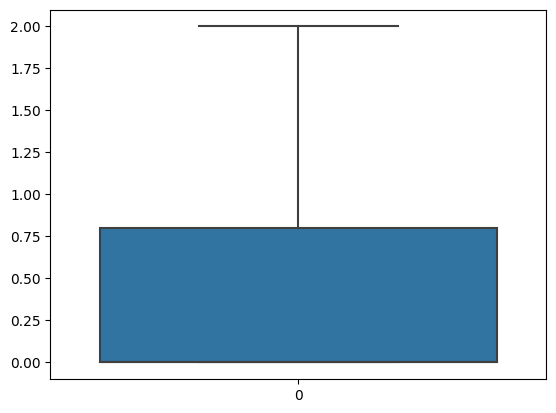

In [18]:
sns.boxplot(df['Rainfall'])

### Handling Null values

#### Numerical columns

In [48]:
df.select_dtypes(include='float').isnull().sum()

MinTemp            636
MaxTemp            321
Rainfall          1406
Evaporation      60803
Sunshine         67802
WindGustSpeed     9267
WindSpeed9am      1348
WindSpeed3pm      2629
Humidity9am       1774
Humidity3pm       3608
Pressure9am      14012
Pressure3pm      13979
Cloud9am         53654
Cloud3pm         57089
Temp9am            904
Temp3pm           2724
dtype: int64

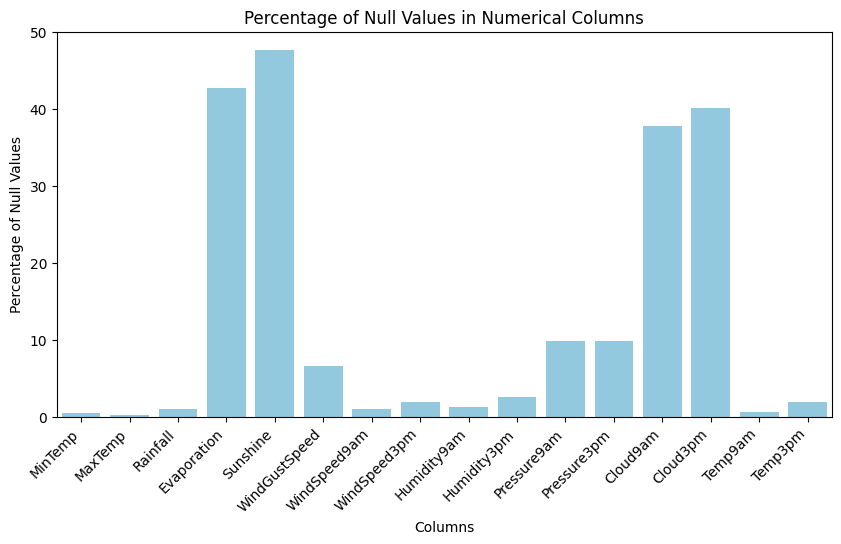

In [49]:
null_percentage = (df.select_dtypes(include='float').isnull().sum() / len(df)) * 100

# Create a bar plot using seaborn
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=null_percentage.index, y=null_percentage.values, color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 
plt.title('Percentage of Null Values in Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Percentage of Null Values')
plt.show()

"The 'Evaporation', 'Sunshine', 'Cloud9am' and 'Cloud3pm' columns have many missing values. For 'MinTemp' and 'MaxTemp,' I'll use mean values, and for 'Temp9am' and 'Temp3pm,' I'll fill based on the minimum and maximum temperatures. I'll analyze the other columns and fill them accordingly."

##### Filling Temperature

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


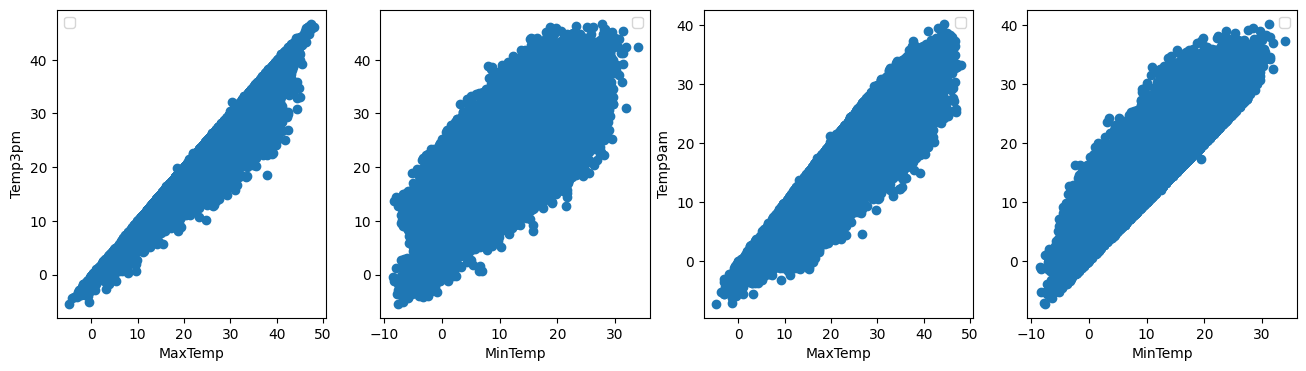

In [50]:
plt.figure(figsize=(16, 4))

# Scatter Plot 1
plt.subplot(1, 4, 1)
plt.scatter(df['MaxTemp'], df['Temp3pm'])
plt.xlabel('MaxTemp')
plt.ylabel('Temp3pm')
plt.legend()

# Scatter Plot 2
plt.subplot(1, 4, 2)
plt.scatter(df['MinTemp'], df['Temp3pm'])
plt.xlabel('MinTemp')
plt.legend()

# Scatter Plot 3
plt.subplot(1, 4, 3)
plt.scatter(df['MaxTemp'], df['Temp9am'])
plt.xlabel('MaxTemp')
plt.ylabel('Temp9am')
plt.legend()

# Scatter Plot 4
plt.subplot(1, 4, 4)
plt.scatter(df['MinTemp'], df['Temp9am'])
plt.xlabel('MinTemp')
plt.legend()


"We can impute the NaN values in 'Temp9am' and 'Temp3pm' based on 'MinTemp' and 'MaxTemp,' respectively, as the morning tends to be colder and the afternoon hotter compared to other periods. However, prior to this, it is necessary to fill in the null values of 'MinTemp' and 'MaxTemp'."

In [19]:
df['MinTemp'].fillna(round(df['MinTemp'].mean(), 1), inplace=True)
df['MaxTemp'].fillna(round(df['MaxTemp'].mean(), 1), inplace=True)
df['Temp3pm'].fillna(df['MaxTemp'], inplace=True)
df['Temp9am'].fillna(df['MinTemp'], inplace=True)

##### Filling Pressure

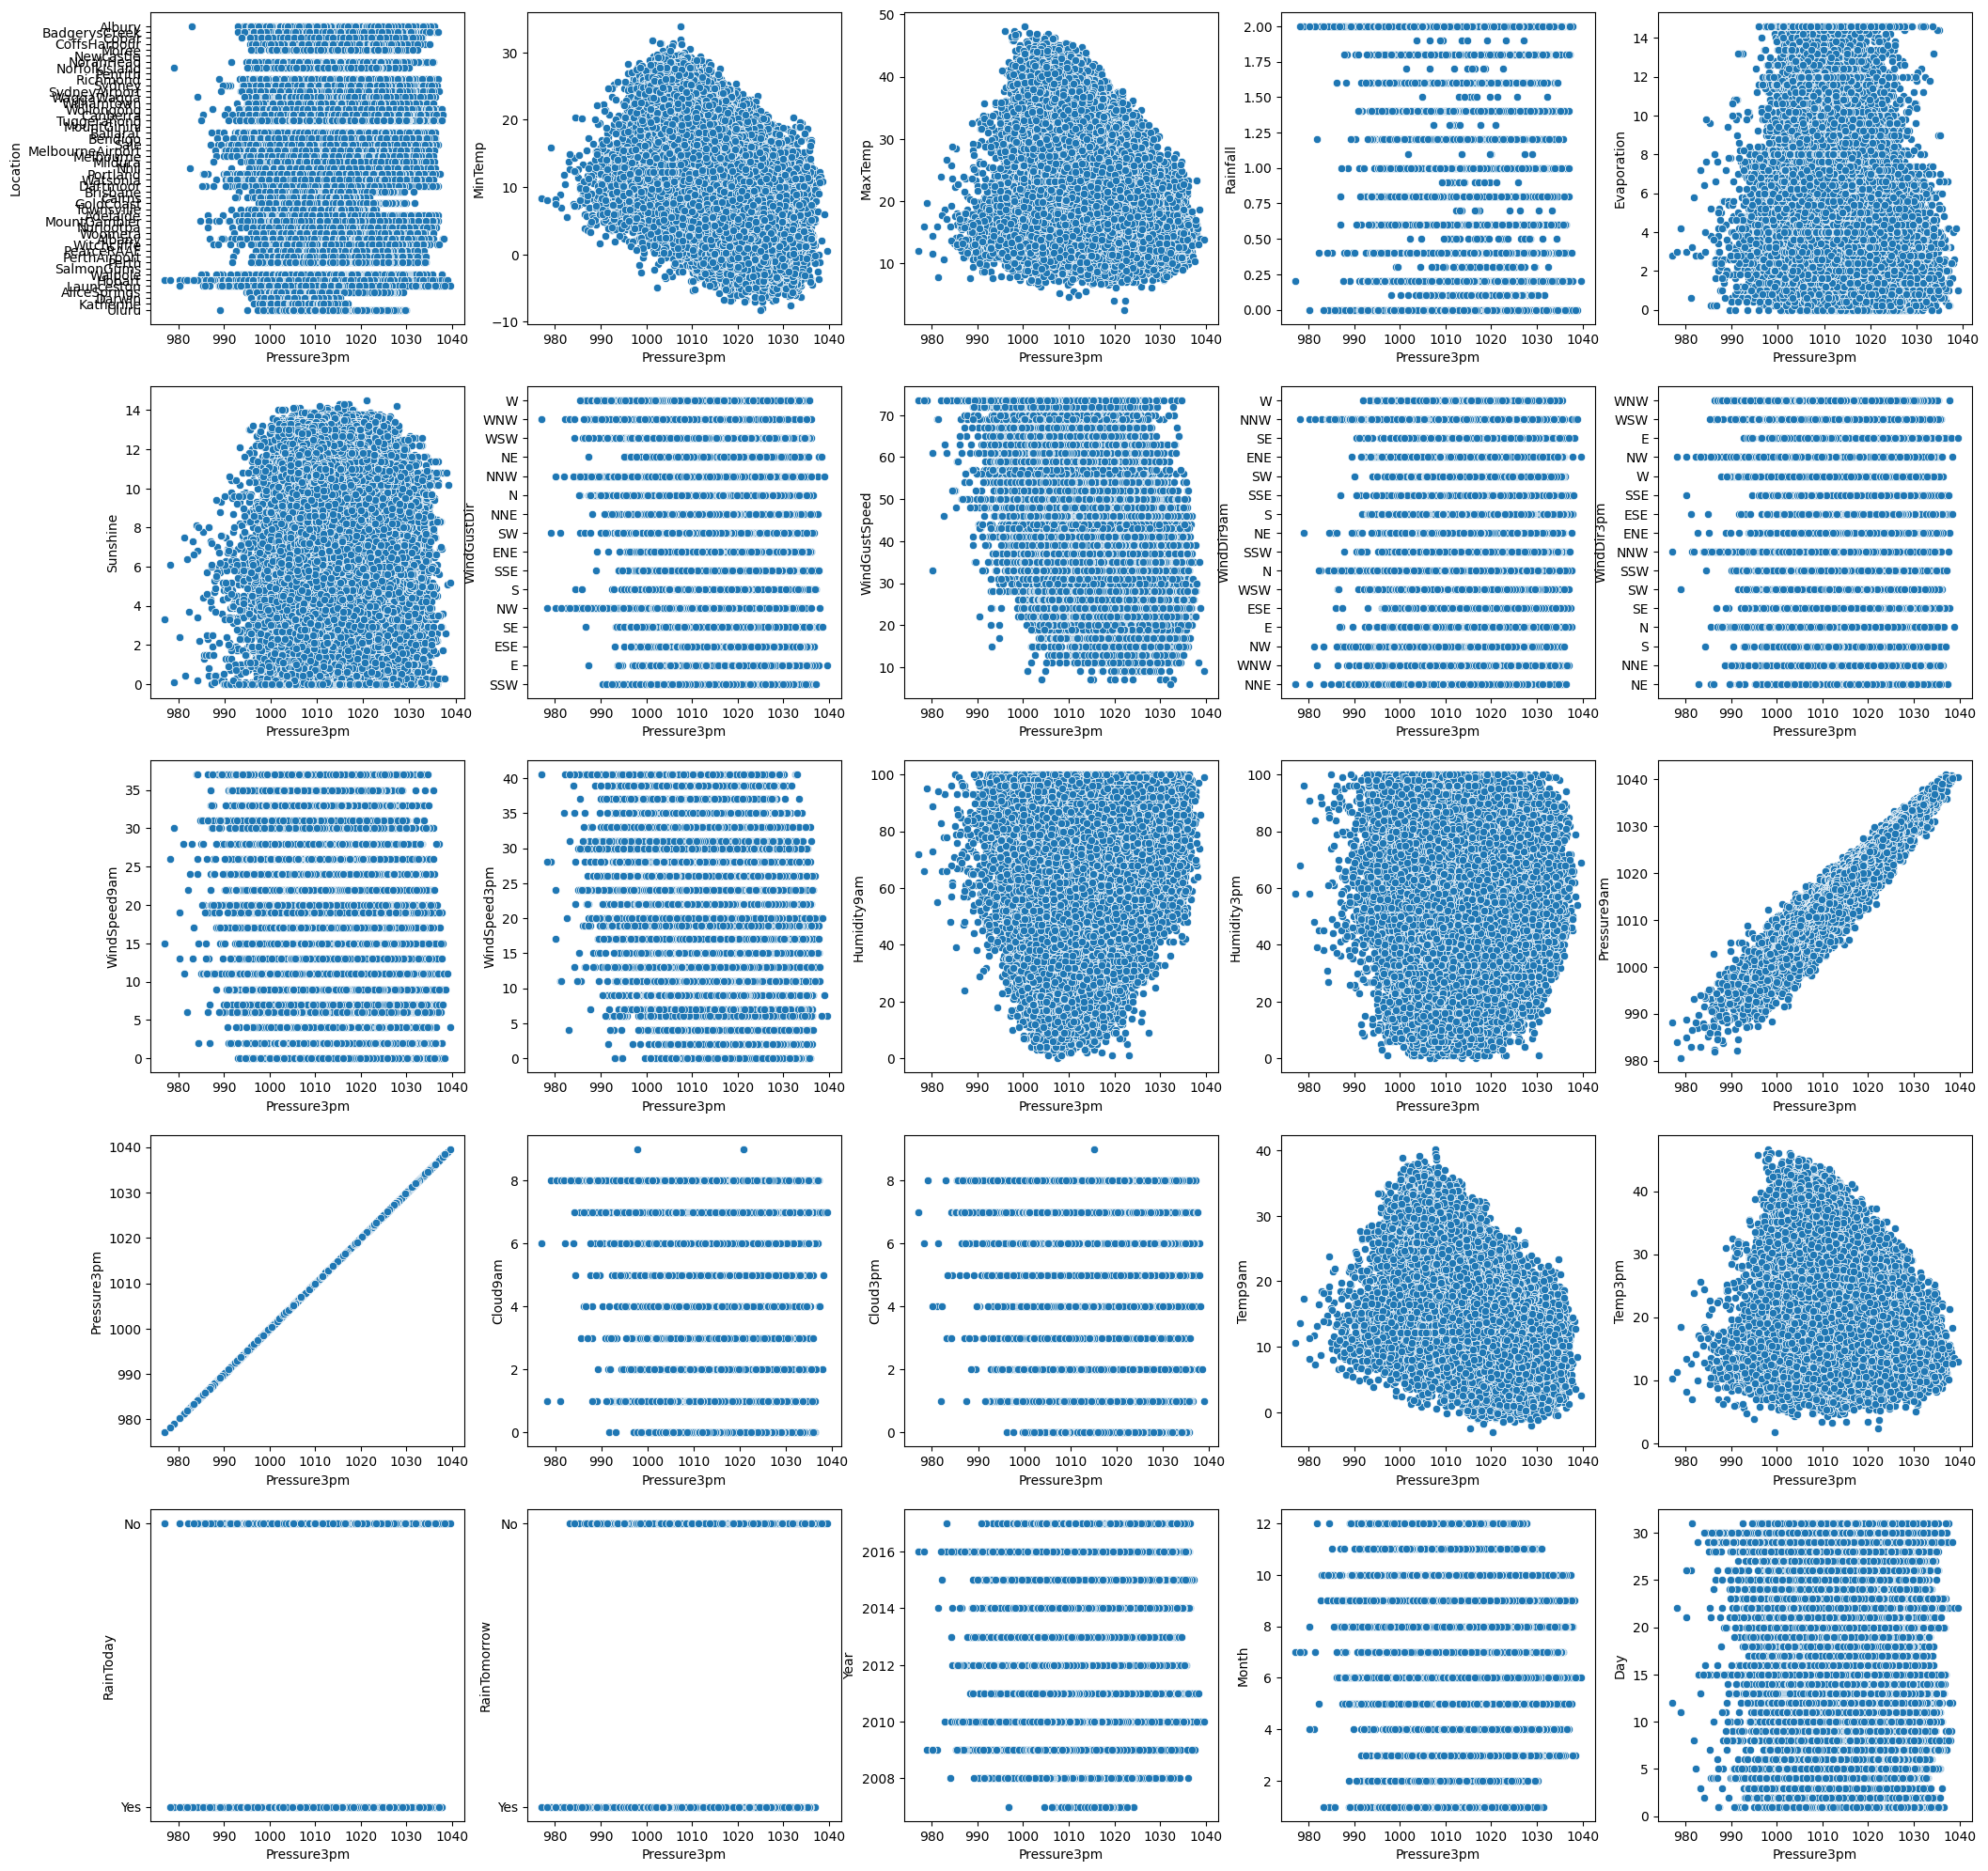

In [52]:
plt.figure(figsize=(25, 25))
columns = df.columns
for i, col in enumerate(columns):
    plt.subplot(5, 5, i+1)
    sns.scatterplot(x=df['Pressure3pm'], y=df[col])

In [20]:
# I will fill the values of Pressures with mean value because there are no any relationship between any value and pressure
df['Pressure3pm'].fillna(round(df['Pressure3pm'].mean(), 1), inplace=True)
df['Pressure9am'].fillna(round(df['Pressure9am'].mean(), 1), inplace=True)

##### Filling Wind Speed

In [21]:
# I will fill the wind speed with mean 
df['WindSpeed9am'].fillna(round(df['WindSpeed9am'].mean(), 1), inplace=True)
df['WindSpeed3pm'].fillna(round(df['WindSpeed3pm'].mean(), 1), inplace=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


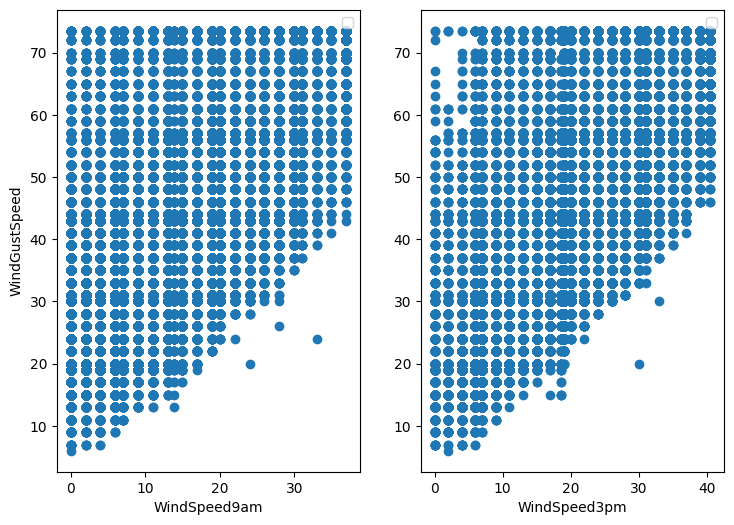

In [55]:
plt.figure(figsize=(18, 6))

# Scatter Plot 1
plt.subplot(1, 4, 1)
plt.scatter(df['WindSpeed9am'], df['WindGustSpeed'])
plt.xlabel('WindSpeed9am')
plt.ylabel('WindGustSpeed')
plt.legend()

# Scatter Plot 2
plt.subplot(1, 4, 2)
plt.scatter(df['WindSpeed3pm'], df['WindGustSpeed'])
plt.xlabel('WindSpeed3pm')
plt.legend()

I will identify rows in the DataFrame where 'WindGustSpeed' is null. For each of these rows, I plan to check if the corresponding 'WindSpeed9am' is greater than 40. If true, I will fill the null 'WindGustSpeed' with a random value between 10 and 70; otherwise, I'll fill it with a random value between the existing 'WindSpeed9am' and 70 based on the graph.

In [22]:
# I will fill the null values which  WindSpeed9am 
null_df = df[df['WindGustSpeed'].isnull()]

for index, row in null_df.iterrows():
    if row['WindSpeed9am'] > 40 and row['WindSpeed3pm']> 40:
        df.at[index, 'WindGustSpeed'] = np.round(np.random.uniform(10, 70, 1), 1)
    elif row['WindSpeed9am'] > row['WindSpeed3pm']:
        df.at[index, 'WindGustSpeed'] = np.round(np.random.uniform(row['WindSpeed9am'], 70, 1), 1)
    else:
        df.at[index, 'WindGustSpeed'] = np.round(np.random.uniform(row['WindSpeed3pm'], 70, 1), 1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


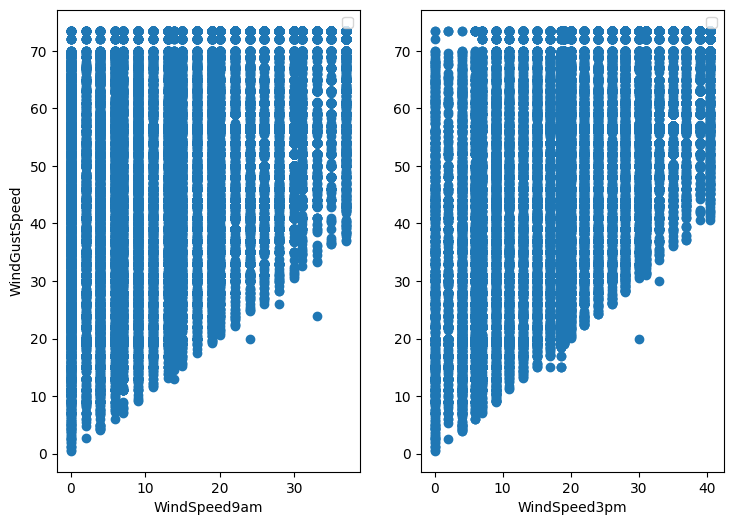

In [57]:
plt.figure(figsize=(18, 6))

# Scatter Plot 1
plt.subplot(1, 4, 1)
plt.scatter(df['WindSpeed9am'], df['WindGustSpeed'])
plt.xlabel('WindSpeed9am')
plt.ylabel('WindGustSpeed')
plt.legend()

# Scatter Plot 2
plt.subplot(1, 4, 2)
plt.scatter(df['WindSpeed3pm'], df['WindGustSpeed'])
plt.xlabel('WindSpeed3pm')
plt.legend()

##### Filling Humidity

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

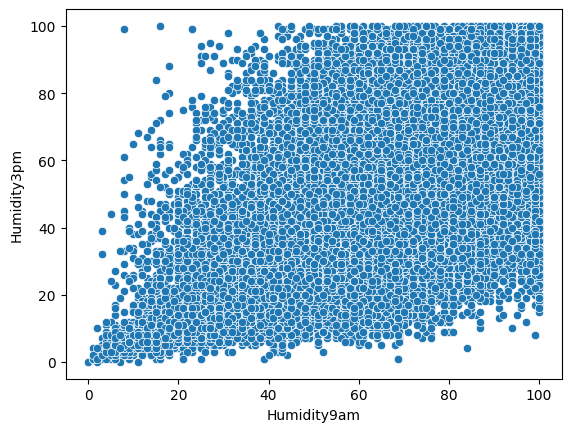

In [23]:
# I will fill the 'Humidity9am' with mean value and look for if it has an affect to 'Humidity3pm'
df['Humidity9am'].fillna(round(df['Humidity9am'].mean(), 1), inplace=True)
sns.scatterplot(x=df['Humidity9am'], y=df['Humidity3pm'])

In [24]:
# I will use same method as Wind
# I will fill the null values which  WindSpeed9am 
null_df = df[df['Humidity3pm'].isnull()]

for index, row in null_df.iterrows():
    if row['Humidity9am'] < 40:
        df.at[index, 'Humidity3pm'] = np.round(np.random.uniform(0, 2*row['Humidity9am'], 1), 1)
    elif row['Humidity9am'] > 40 and row['Humidity9am'] < 70:
        df.at[index, 'Humidity3pm'] = np.round(np.random.uniform(0, 100, 1), 1)
    else:
        df.at[index, 'Humidity3pm'] = np.round(np.random.uniform(20, 100, 1), 1)

<Axes: xlabel='Humidity9am', ylabel='Humidity3pm'>

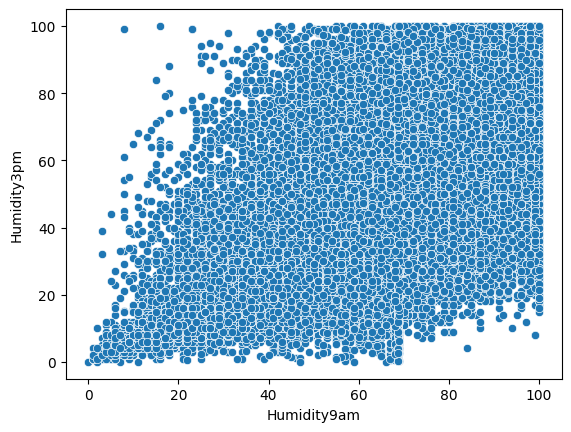

In [60]:
sns.scatterplot(x=df['Humidity9am'], y=df['Humidity3pm'])

##### Filling Rainfall

In [25]:
df['Rainfall'].fillna(round(df['Rainfall'].mean(), 1), inplace=True)

##### Filling 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'

I will change them with mode for now and after i will use some algorithms to look for that these have any good for the predicitions if not i will drop them.

In [26]:
none_cols = ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm' ]
df[none_cols] = df[none_cols].fillna(df[none_cols].mode().iloc[0])

#### Categorical columns 

In [63]:
df.select_dtypes(include='object').isnull().sum()

Location            0
WindGustDir      9327
WindDir9am      10013
WindDir3pm       3776
RainToday        1406
RainTomorrow        0
dtype: int64

##### Filling RainToday

In [64]:
# I will fill RainToday based on Rianfall
df[df['Rainfall']>1.1]['RainToday'].value_counts()

Yes    31403
Name: RainToday, dtype: int64

In [27]:
null_df = df[df['RainToday'].isnull()]

for index, row in null_df.iterrows():
    if row['Rainfall'] > 1.1:
        df.at[index, 'RainToday'] = 'Yes'
    else:
        df.at[index, 'RainToday'] = 'No'


In [66]:
df.isnull().sum()

Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       9327
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3776
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RainTomorrow         0
Year                 0
Month                0
Day                  0
dtype: int64

##### Filling WindDir

In [28]:
df.groupby('Location')['WindGustDir'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


Location
Adelaide             WSW
Albany              None
Albury                 W
AliceSprings         ESE
BadgerysCreek         SW
Ballarat               N
Bendigo              SSE
Brisbane               E
Cairns                SE
Canberra              NW
Cobar                 SW
CoffsHarbour          NE
Dartmoor             SSW
Darwin                 E
GoldCoast            SSE
Hobart               NNW
Katherine              E
Launceston           NNW
Melbourne              N
MelbourneAirport       N
Mildura              SSW
Moree                NNE
MountGambier           S
MountGinini            W
Newcastle           None
Nhil                   W
NorahHead              S
NorfolkIsland          E
Nuriootpa             SE
PearceRAAF             E
Penrith               SE
Perth                 SW
PerthAirport           E
Portland               W
Richmond              SE
Sale                   W
SalmonGums           SSW
Sydney                 W
SydneyAirport          S
Townsville      

In [29]:
df[df['Location']=='Newcastle']['WindGustDir'].count()

0

In [30]:
df[df['Location']=='Albany']['WindGustDir'].count()

0

The 'Albany' and 'Newcastle' countries are all missing, so we will fill other countries with their respective most common values. For 'Albany' and 'Newcastle,' we will use the mode of the entire dataset.

In [31]:
# Apply the function to fill null values based on location
categorical_columns = ['WindDir9am', 'WindDir3pm', 'WindGustDir']
df[categorical_columns] = df[categorical_columns].fillna(df.groupby('Location')[categorical_columns].transform(lambda x: x.mode().iloc[0]))

In [32]:
df[categorical_columns].isnull().sum()

WindDir9am        0
WindDir3pm        0
WindGustDir    5971
dtype: int64

In [33]:
df['WindGustDir'].fillna(df['WindGustDir'].mode().iloc[0], inplace=True)

In [34]:
df[categorical_columns].isnull().sum()

WindDir9am     0
WindDir3pm     0
WindGustDir    0
dtype: int64

### Encoding and Normalization

In [74]:
df.select_dtypes(include='object').columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')

There are 6 categorical columns the two of them are binary categorical('RainToday', ''RainTomorrow').

In [75]:
pd.get_dummies(df['Location'], drop_first=True).head()

Albany  Albury  AliceSprings  BadgerysCreek  Ballarat  Bendigo  Brisbane  \
0       0       1             0              0         0        0         0   
1       0       1             0              0         0        0         0   
2       0       1             0              0         0        0         0   
3       0       1             0              0         0        0         0   
4       0       1             0              0         0        0         0   

   Cairns  Canberra  Cobar  ...  Townsville  Tuggeranong  Uluru  WaggaWagga  \
0       0         0      0  ...           0            0      0           0   
1       0         0      0  ...           0            0      0           0   
2       0         0      0  ...           0            0      0           0   
3       0         0      0  ...           0            0      0           0   
4       0         0      0  ...           0            0      0           0   

   Walpole  Watsonia  Williamtown  Witchcliffe  Wollongong  Woomera  
0        0         0            0            0           0        0  
1        0         0            0            0           0        0  
2        0         0            0            0           0        0  
3        0         0            0            0           0        0  
4        0         0            0            0           0        0  

[5 rows x 48 columns]

In [76]:
pd.get_dummies(df['WindGustDir'], drop_first=True).head()

ENE  ESE  N  NE  NNE  NNW  NW  S  SE  SSE  SSW  SW  W  WNW  WSW
0    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0
1    0    0  0   0    0    0   0  0   0    0    0   0  0    1    0
2    0    0  0   0    0    0   0  0   0    0    0   0  0    0    1
3    0    0  0   1    0    0   0  0   0    0    0   0  0    0    0
4    0    0  0   0    0    0   0  0   0    0    0   0  1    0    0

In [77]:
pd.get_dummies(df['RainToday'], drop_first=True).head()

Yes
0    0
1    0
2    0
3    0
4    0

In [35]:
# One-Hot Encoding for categorical 
import copy 
data = df.copy(deep=True)
encoded_columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for i in encoded_columns:
    data = pd.concat([data, pd.get_dummies(data[i], prefix=i, drop_first=True)], axis=1)
    data = data.drop(columns=[i])

In [36]:
from sklearn.preprocessing import LabelEncoder
# Label Encoding for binary categorical

label_encoder = LabelEncoder()
data['RainTomorrow'] =label_encoder.fit_transform(df['RainTomorrow'])
data['RainToday'] =label_encoder.fit_transform(df['RainToday'])

In [37]:
data

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0          13.4     22.9       0.6          4.0       0.0           44.0   
1           7.4     25.1       0.0          4.0       0.0           44.0   
2          12.9     25.7       0.0          4.0       0.0           46.0   
3           9.2     28.0       0.0          4.0       0.0           24.0   
4          17.5     32.3       1.0          4.0       0.0           41.0   
...         ...      ...       ...          ...       ...            ...   
142188      3.5     21.8       0.0          4.0       0.0           31.0   
142189      2.8     23.4       0.0          4.0       0.0           31.0   
142190      3.6     25.3       0.0          4.0       0.0           22.0   
142191      5.4     26.9       0.0          4.0       0.0           37.0   
142192      7.8     27.0       0.0          4.0       0.0           28.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0               20.0          24.0         71.0         22.0  ...   
1                4.0          22.0         44.0         25.0  ...   
2               19.0          26.0         38.0         30.0  ...   
3               11.0           9.0         45.0         16.0  ...   
4                7.0          20.0         82.0         33.0  ...   
...              ...           ...          ...          ...  ...   
142188          15.0          13.0         59.0         27.0  ...   
142189          13.0          11.0         51.0         24.0  ...   
142190          13.0           9.0         56.0         21.0  ...   
142191           9.0           9.0         53.0         24.0  ...   
142192          13.0           7.0         51.0         24.0  ...   

        WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
0                    0              0             0              0   
1                    0              0             0              0   
2                    0              0             0              0   
3                    0              0             0              0   
4                    0              1             0              0   
...                ...            ...           ...            ...   
142188               0              0             0              0   
142189               0              0             0              0   
142190               0              0             0              0   
142191               0              0             0              0   
142192               0              0             0              0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                    0               0              0             0   
1                    0               0              0             0   
2                    0               0              0             0   
3                    0               0              0             0   
4                    0               0              0             0   
...                ...             ...            ...           ...   
142188               0               0              0             0   
142189               0               0              0             0   
142190               0               0              0             0   
142191               0               0              0             0   
142192               0               0              0             0   

        WindDir3pm_WNW  WindDir3pm_WSW  
0                    1               0  
1                    0               1  
2                    0               1  
3                    0               0  
4                    0               0  
...                ...             ...  
142188               0               0  
142189               0               0  
142190               0               0  
142191               1               0  
142192               0               0  

[142193 rows x 114 columns]

In [81]:
list(df.select_dtypes(include='float').columns)

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [38]:
from sklearn.preprocessing import StandardScaler
columns_to_scale = list(df.select_dtypes(include='float').columns)
scaler = StandardScaler()
data[columns_to_scale]= scaler.fit_transform(df[columns_to_scale])

In [39]:
data['Year']= scaler.fit_transform(df['Year'].values.reshape(-1, 1))
data['Month']= scaler.fit_transform(df['Month'].values.reshape(-1, 1))
data['Day']= scaler.fit_transform(df['Day'].values.reshape(-1, 1))

In [40]:
data

MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0       0.189945 -0.045956  0.144856    -0.283417 -0.850637       0.295871   
1      -0.749184  0.263488 -0.616638    -0.283417 -0.850637       0.295871   
2       0.111684  0.347882 -0.616638    -0.283417 -0.850637       0.447181   
3      -0.467445  0.671391 -0.616638    -0.283417 -0.850637      -1.217234   
4       0.831683  1.276213  0.652519    -0.283417 -0.850637       0.068905   
...          ...       ...       ...          ...       ...            ...   
142188 -1.359617 -0.200678 -0.616638    -0.283417 -0.850637      -0.687648   
142189 -1.469182  0.024372 -0.616638    -0.283417 -0.850637      -0.687648   
142190 -1.343965  0.291619 -0.616638    -0.283417 -0.850637      -1.368545   
142191 -1.062227  0.516669 -0.616638    -0.283417 -0.850637      -0.233716   
142192 -0.686575  0.530735 -0.616638    -0.283417 -0.850637      -0.914613   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  \
0           0.711977      0.645378     0.113920    -1.407417  ...   
1          -1.159157      0.408608    -1.312236    -1.264418  ...   
2           0.595031      0.882148    -1.629159    -1.026087  ...   
3          -0.340536     -1.130394    -1.259415    -1.693415  ...   
4          -0.808319      0.171839     0.694947    -0.883088  ...   
...              ...           ...          ...          ...  ...   
142188      0.127248     -0.656855    -0.519927    -1.169086  ...   
142189     -0.106644     -0.893625    -0.942492    -1.312085  ...   
142190     -0.106644     -1.130394    -0.678389    -1.455084  ...   
142191     -0.574427     -1.130394    -0.836851    -1.312085  ...   
142192     -0.106644     -1.367164    -0.942492    -1.312085  ...   

        WindDir3pm_NNW  WindDir3pm_NW  WindDir3pm_S  WindDir3pm_SE  \
0                    0              0             0              0   
1                    0              0             0              0   
2                    0              0             0              0   
3                    0              0             0              0   
4                    0              1             0              0   
...                ...            ...           ...            ...   
142188               0              0             0              0   
142189               0              0             0              0   
142190               0              0             0              0   
142191               0              0             0              0   
142192               0              0             0              0   

        WindDir3pm_SSE  WindDir3pm_SSW  WindDir3pm_SW  WindDir3pm_W  \
0                    0               0              0             0   
1                    0               0              0             0   
2                    0               0              0             0   
3                    0               0              0             0   
4                    0               0              0             0   
...                ...             ...            ...           ...   
142188               0               0              0             0   
142189               0               0              0             0   
142190               0               0              0             0   
142191               0               0              0             0   
142192               0               0              0             0   

        WindDir3pm_WNW  WindDir3pm_WSW  
0                    1               0  
1                    0               1  
2                    0               1  
3                    0               0  
4                    0               0  
...                ...             ...  
142188               0               0  
142189               0               0  
142190               0               0  
142191               1               0  
142192               0               0  

[142193 rows x 114 columns]

# Classification


In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_scores={}

# Calculation of all metrices
def metrices(y_true, y_pred):
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    print(f'Accuracy: {accuracy:.4f}')

    # Precision
    precision = precision_score(y_true, y_pred)
    print(f'Precision: {precision:.4f}')

    # Recall
    recall = recall_score(y_true, y_pred)
    print(f'Recall: {recall:.4f}')

    # F1 Score
    f1 = f1_score(y_true, y_pred)
    print(f'F1 Score: {f1:.4f}')

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f'Confusion Matrix:\n{conf_matrix}')


In [42]:
from sklearn.metrics import precision_recall_curve, RocCurveDisplay, PrecisionRecallDisplay, ConfusionMatrixDisplay

def graphing(model ,x_test, y_test):
    
    # ROC Curve
    RocCurveDisplay.from_estimator(model ,x_test, y_test)

    # Confusion Matrix Heatmap
    ConfusionMatrixDisplay.from_estimator(model ,x_test, y_test, cmap=plt.cm.Blues)

    plt.tight_layout()
    plt.show()


In [43]:
from sklearn.model_selection import train_test_split

X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Traditional models


### Decision Trees

In [44]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_model = DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=15, min_samples_split=5)
decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=15,
                       min_samples_split=5)

In [45]:
y_pred = decision_tree_model.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.8190
Precision: 0.6149
Recall: 0.5176
F1 Score: 0.5621
Confusion Matrix:
[[29982  3103]
 [ 4618  4955]]


In [46]:
accuracy_scores['Decision Tree Classifier']= accuracy_score(y_test, y_pred)

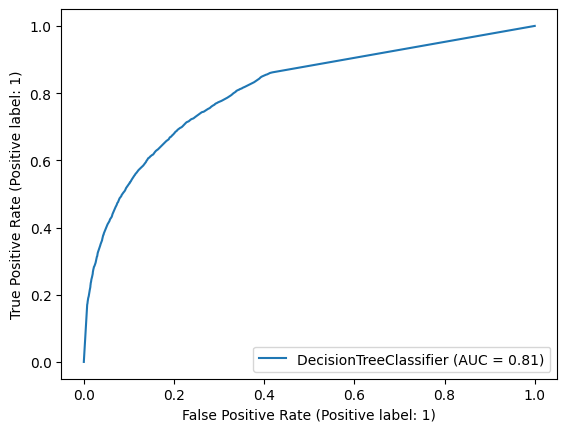

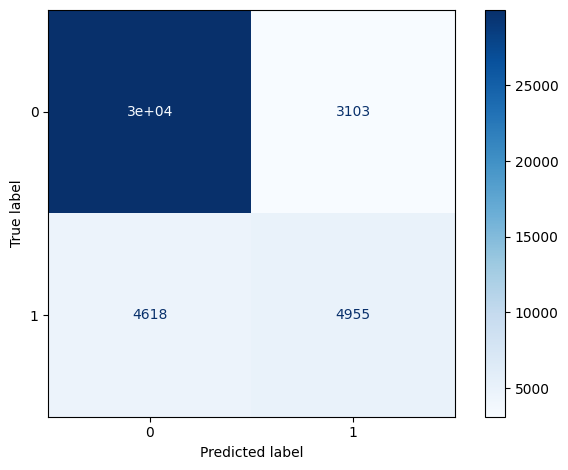

In [47]:
graphing(decision_tree_model,X_test,y_test)

#### Hyperparameter tuning

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7, 11, 13],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 3, 5, 7],
}

clf_gs = GridSearchCV(decision_tree_model, param_grid=params, scoring='accuracy', cv=3)
clf_gs.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(criterion='log_loss',
                                              min_samples_leaf=15,
                                              min_samples_split=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 7, 11, 13],
                         'min_samples_leaf': [1, 3, 5, 7],
                         'min_samples_split': [2, 5, 10, 15]},
             scoring='accuracy')

In [50]:
clf_gs.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 15}

In [51]:
round(clf_gs.best_score_, 4)

0.8378

In [52]:
y_pred_tree_gs = clf_gs.best_estimator_.predict(X_test)
y_pred_tree_gs

array([1, 1, 0, ..., 0, 0, 0])

In [53]:
metrices(y_test, y_pred_tree_gs)

Accuracy: 0.8370
Precision: 0.7141
Recall: 0.4566
F1 Score: 0.5570
Confusion Matrix:
[[31335  1750]
 [ 5202  4371]]


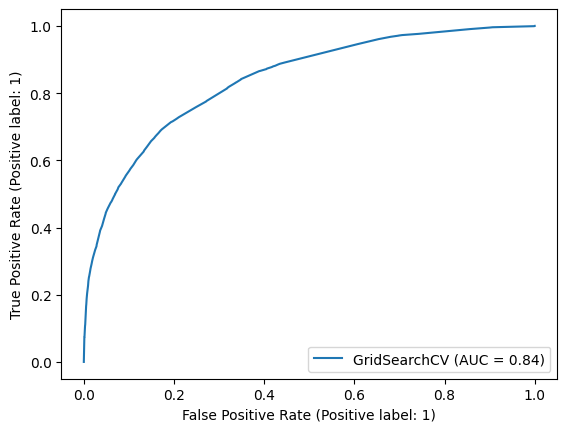

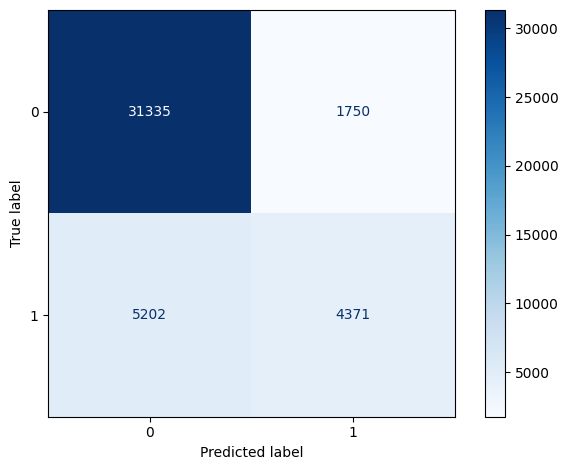

In [54]:
graphing(clf_gs, X_test, y_test)

In [55]:
accuracy_scores['Decision Tree Classifier after Tuning']= accuracy_score(y_test, y_pred_tree_gs)

### Linear Discriminant Analysis (LDA)

In [56]:
# Because of the accuracy is low we do some over sampling and then try other algoritms 
# (also tunning takes reallllyyyy long time so i can't do it in others but i will do oversampling for increasing accuracy )
from imblearn.over_sampling import SMOTE

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=104)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit_transform(X_train, y_train)

array([[-1.65103354],
       [ 0.42784016],
       [-0.00517583],
       ...,
       [ 2.22941727],
       [ 0.20787897],
       [ 2.3057222 ]])

In [58]:
y_pred = lda.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.8715
Precision: 0.9033
Recall: 0.8321
F1 Score: 0.8663
Confusion Matrix:
[[30139  2946]
 [ 5555 27530]]


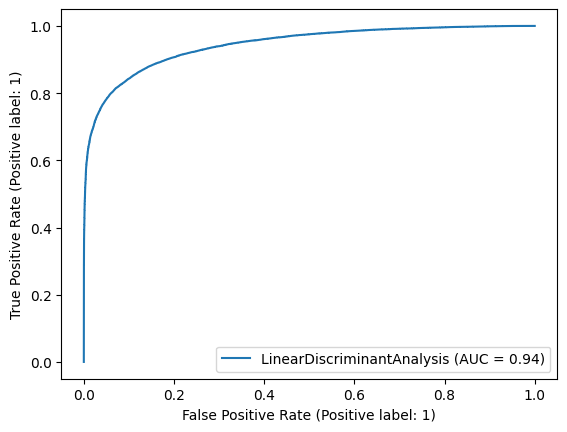

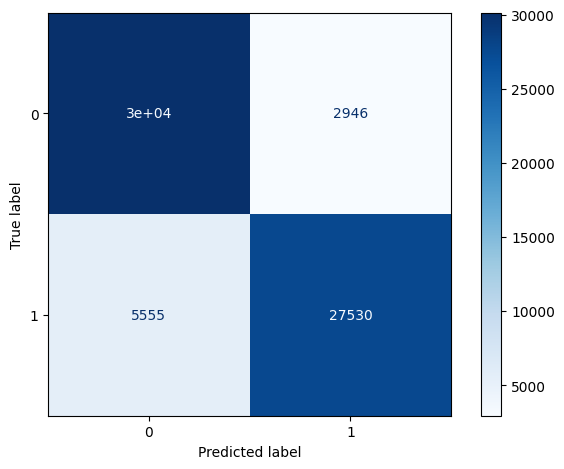

In [59]:
graphing(lda, X_test, y_test)

In [60]:
accuracy_scores['Linear Discriminant Analysis']=accuracy_score(y_test, y_pred)

### K-Nearest Neighbors (KNN)

In [61]:
from sklearn.neighbors import KNeighborsClassifier

knearest = KNeighborsClassifier(n_neighbors=5, n_jobs=5, algorithm='brute')
knearest.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=5)

In [62]:
y_pred = knearest.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.7720
Precision: 0.7051
Recall: 0.9350
F1 Score: 0.8039
Confusion Matrix:
[[20144 12941]
 [ 2149 30936]]


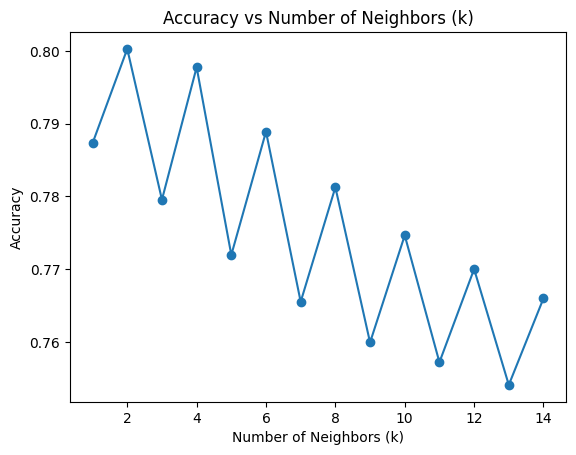

In [63]:
# Lists to store accuracy values
accuracies = []

# Evaluate the model's performance for each value of k on the validation set
for k in range(1,15):
    knearest.n_neighbors = k
    knearest.fit(X_train, y_train)
    y_val_pred = knearest.predict(X_test)
    accuracy = accuracy_score(y_test, y_val_pred)
    accuracies.append(accuracy)

# Plot the accuracy values for different values of k
plt.plot(range(1,15), accuracies, marker='o')
plt.title('Accuracy vs Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.show()

In [64]:
# I will choose the best number of neighbors as 2 and train the model again
knearest = KNeighborsClassifier(n_neighbors=2)
knearest.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [65]:
y_pred = knearest.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.8003
Precision: 0.7917
Recall: 0.8150
F1 Score: 0.8032
Confusion Matrix:
[[25990  7095]
 [ 6122 26963]]


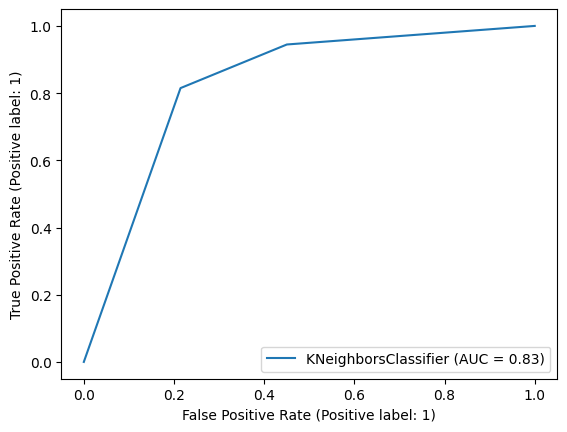

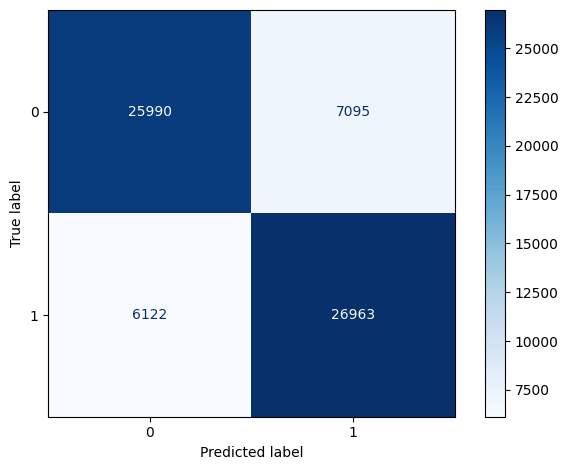

In [66]:
graphing(knearest, X_test, y_test)

In [67]:
accuracy_scores['K-Neighbors Classifier']=accuracy_score(y_test, y_pred)

## Ensemble models

### XGBoost

In [68]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective='binary:logistic', random_state=42)
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
y_pred = xgb_classifier.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.9016
Precision: 0.9245
Recall: 0.8747
F1 Score: 0.8989
Confusion Matrix:
[[30720  2365]
 [ 4145 28940]]


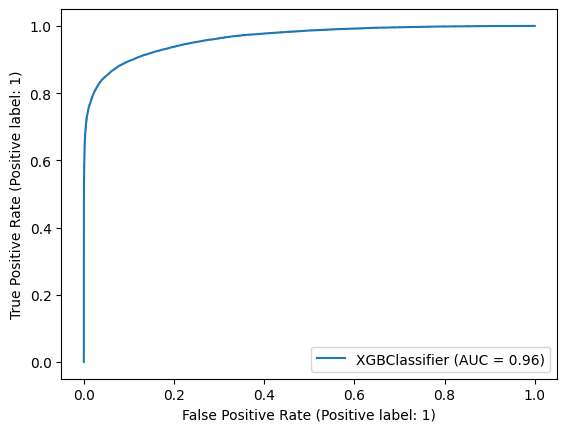

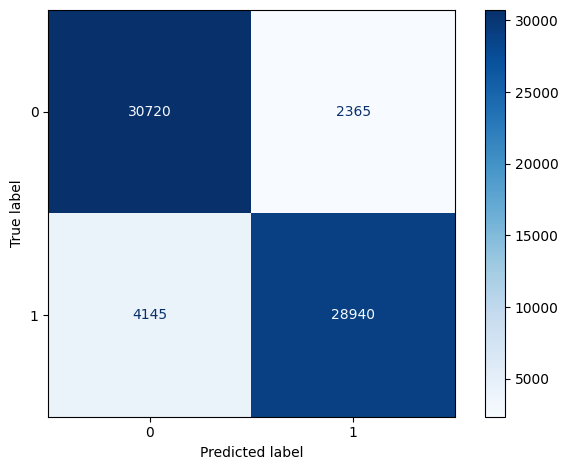

In [70]:
graphing(xgb_classifier, X_test, y_test)

In [71]:
accuracy_scores['XGBoost Classifier']=accuracy_score(y_test, y_pred)

### Random Forest Classifier

In [72]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=80, criterion='entropy')
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=80)

In [73]:
y_pred = rfc.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.8636
Precision: 0.8979
Recall: 0.8205
F1 Score: 0.8575
Confusion Matrix:
[[29998  3087]
 [ 5938 27147]]


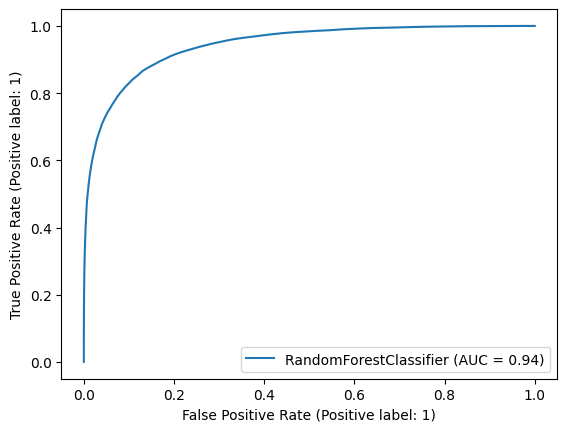

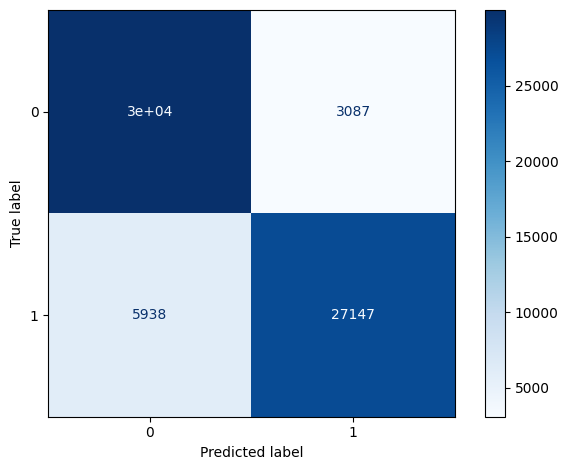

In [74]:
graphing(rfc, X_test, y_test)

In [75]:
accuracy_scores['Random Forest Classifier']=accuracy_score(y_test, y_pred)

### Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

voting_classifier = VotingClassifier(voting='soft', estimators=[
        ('xgb', xgb_classifier),
        ('rf', rfc),
        ('lda', lda)])
voting_classifier.fit(X_train, y_train)


VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_ra...
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     n_estimators=80)),
                             ('lda', LinearDiscriminantAnalysis())],
                 voting='soft')

In [77]:
y_pred = voting_classifier.predict(X_test)
metrices(y_test, y_pred)

Accuracy: 0.8980
Precision: 0.9231
Recall: 0.8682
F1 Score: 0.8948
Confusion Matrix:
[[30693  2392]
 [ 4360 28725]]


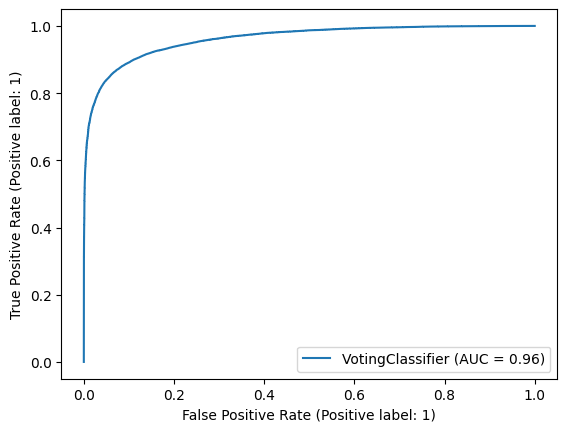

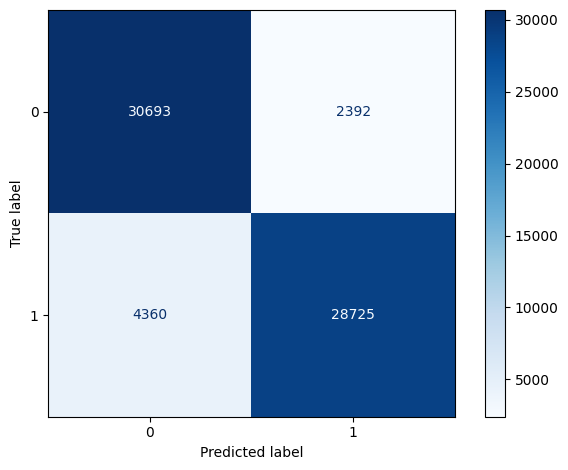

In [78]:
graphing(voting_classifier, X_test, y_test)

In [79]:
accuracy_scores['Voting Classifier']=accuracy_score(y_test, y_pred)

## Neural network models

### Sequential neural network classifier optimizer adam

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import History

In [81]:
X_train.shape

(154462, 113)

In [118]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units= 113, activation = 'relu', input_dim = 113))
classifier.add(Dropout(0.2))

# Adding the second hidden layer
classifier.add(Dense(units = 115, activation = 'relu'))
classifier.add(Dropout(0.3))

# Adding the third hidden layer
classifier.add(Dense(units = 150, activation = 'relu'))
classifier.add(Dropout(0.5))

# Adding the third hidden layer
classifier.add(Dense(units = 100, activation = 'relu'))
classifier.add(Dropout(0.1))

# Adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [119]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [120]:
history=History()
history = classifier.fit(X_train, y_train, batch_size=100, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=1)

Epoch 1/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.3447 - accuracy: 0.8482 - val_loss: 0.2732 - val_accuracy: 0.8844
Epoch 2/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2847 - accuracy: 0.8788 - val_loss: 0.2571 - val_accuracy: 0.8896
Epoch 3/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2693 - accuracy: 0.8842 - val_loss: 0.2574 - val_accuracy: 0.8910
Epoch 4/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2608 - accuracy: 0.8885 - val_loss: 0.2492 - val_accuracy: 0.8931
Epoch 5/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2553 - accuracy: 0.8901 - val_loss: 0.2480 - val_accuracy: 0.8935
Epoch 6/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.8931 - val_loss: 0.2483 - val_accuracy: 0.8929
Epoch 7/100
1545/1545 [==============================] - 4s 2ms/step - loss: 0.2473 - accuracy: 0.8936 - val_loss: 0.2493 - val_ac

In [121]:
y_pred = np.round(classifier.predict(X_test))
metrices(y_test, y_pred)

2068/2068 [==============================] - 1s 450us/step
Accuracy: 0.8929
Precision: 0.9204
Recall: 0.8603
F1 Score: 0.8893
Confusion Matrix:
[[30623  2462]
 [ 4622 28463]]


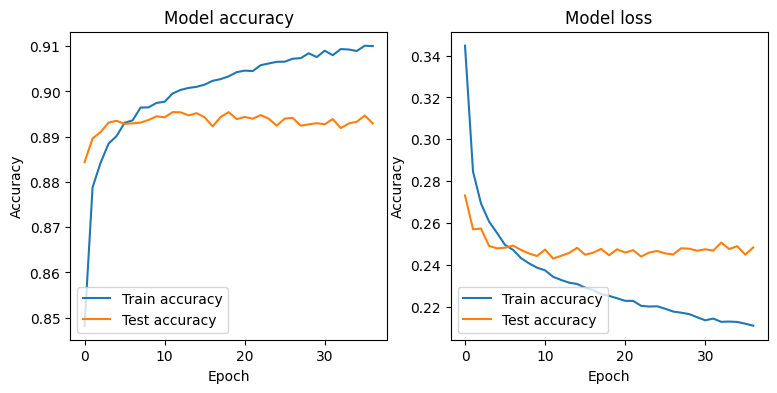

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower left')

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Test accuracy'], loc='lower left')

In [123]:
accuracy_scores['Sequential neural network classifier']=accuracy_score(y_test, y_pred)

## Final thoughts

In [124]:
accuracy_scores

{'Decision Tree Classifier': 0.8190022973416475,
 'Decision Tree Classifier after Tuning': 0.8370293965961836,
 'Linear Discriminant Analysis': 0.871527882726311,
 'K-Neighbors Classifier': 0.8002569140093698,
 'XGBoost Classifier': 0.9016170470001511,
 'Random Forest Classifier': 0.8636088862022064,
 'Voting Classifier': 0.8979598005138281,
 'Sequential neural network classifier': 0.8929424210367236}

In [125]:
print("The best accuracy:", max(accuracy_scores.values()))
print("The best model:", max(accuracy_scores, key=lambda k: accuracy_scores[k]))


The best accuracy: 0.9016170470001511
The best model: XGBoost Classifier
